**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
load_ext pycodestyle_magic

In [52]:
%%pycodestyle
from collections import Counter

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y):
        self.X = np.array(X, dtype=float)
        self.y = np.array(y, dtype=float)
        self.cnt = int(np.max(y) + 1)
    
    def predict(self, X):
        ans = []
        for i in np.array(X):
            D = np.sqrt(np.sum((self.X - i)**2, axis = 1))
            neighbors = self.y[np.argsort(D)[0:self.n_neighbors]]
            cnt = Counter(neighbors)
            ans.append(cnt.most_common(1)[0][0])
        return ans
    
    def predict_proba(self, X):
        ans = []
        for i in np.array(X):
            D = np.sqrt(np.sum((self.X - i)**2, axis = 1))
            neighbors = self.y[np.argsort(D)[0:self.n_neighbors]]
            cnt = Counter(neighbors)
            p = np.zeros(self.cnt)
            for j in cnt.items():
                p[int(j[0])] = float(j[1]) / float(self.n_neighbors)
            ans.append(p)
        return ans
    
    def score(self, X, y):
        y_new = self.predict(X)
        return float(sum([float(y_new[i] == y[i]) for i in range(len(y))])) / float(len(y))

**IRIS**

In [94]:
iris = datasets.load_iris()

In [98]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.9, stratify=iris.target)

In [99]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [100]:
%time clf.fit(X_train, y_train)

CPU times: user 844 µs, sys: 360 µs, total: 1.2 ms
Wall time: 5.76 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [101]:
%time my_clf.fit(X_train, y_train)

CPU times: user 83 µs, sys: 36 µs, total: 119 µs
Wall time: 118 µs


In [102]:
%time clf.predict(X_test)

CPU times: user 1.08 ms, sys: 462 µs, total: 1.55 ms
Wall time: 1.57 ms


array([1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0,
       2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2,
       1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2,
       0, 2, 0])

In [103]:
%time my_clf.predict(X_test)

CPU times: user 13.6 ms, sys: 707 µs, total: 14.3 ms
Wall time: 16.4 ms


[1.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 2.0,
 1.0,
 0.0,
 1.0,
 2.0,
 1.0,
 0.0,
 2.0,
 0.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 2.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 2.0,
 1.0,
 2.0,
 2.0,
 0.0,
 2.0,
 0.0]

In [104]:
%time clf.predict_proba(X_test)

CPU times: user 806 µs, sys: 344 µs, total: 1.15 ms
Wall time: 1.17 ms


array([[0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. 

In [105]:
%time my_clf.predict_proba(X_test)

CPU times: user 14.9 ms, sys: 0 ns, total: 14.9 ms
Wall time: 19.7 ms


[array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 0., 1.]),
 array([1., 0., 0.]),
 array([1., 0., 0.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([0., 0., 1.]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([0. , 0.5, 0.5]),
 array([0., 0., 1.]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([0., 0., 1.]),
 array([1., 0., 0.]),
 array([0., 0., 1.]),
 array([0., 1., 0.]),
 array([0., 0., 1.]),
 array([0., 0., 1.]),
 array([0. , 0.5, 0.5]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([0., 0., 1.]),
 array([0. , 0.5, 0.5]),
 array([0., 0., 1.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([0. , 0.5, 0.5]),
 array([1., 0., 0.]),
 array([0. , 0.5, 0.5]),
 array([0., 0., 1.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([1., 0., 0

In [106]:
clf.score(X_test, y_test)

0.9037037037037037

In [107]:
my_clf.score(X_test, y_test)

0.9037037037037037

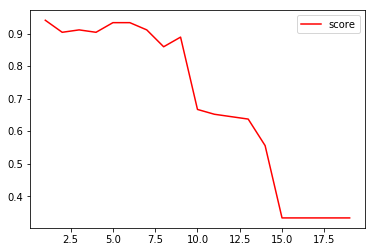

In [113]:
# Задание 3
neighbors = range(1, 20)
errors_score = []
for i in neighbors:
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    errors_score.append(my_clf.score(X_test, y_test))
    
plt.plot(neighbors, errors_score, color='red', label='score')
plt.legend()

In [115]:
print errors_score
print np.argmax(errors_score)

[0.9407407407407408, 0.9037037037037037, 0.9111111111111111, 0.9037037037037037, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.8592592592592593, 0.8888888888888888, 0.6666666666666666, 0.6518518518518519, 0.6444444444444445, 0.6370370370370371, 0.5555555555555556, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
0


**MNIST**

In [65]:
mnist = fetch_mldata('MNIST original')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [67]:
X_train = X_train[0:2000]
y_train = y_train[0:2000]
X_test = X_test[0:2000]
y_test = y_test[0:2000]
print len(X_test), len(y_test), len(X_train), len(y_train)

2000 2000 2000 2000


In [68]:
print y_train

[6. 8. 5. ... 0. 0. 8.]


In [69]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [70]:
%time clf.fit(X_train, y_train)

CPU times: user 177 ms, sys: 10.7 ms, total: 188 ms
Wall time: 198 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [71]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2.14 ms, sys: 11.6 ms, total: 13.7 ms
Wall time: 15.9 ms


In [72]:
%time clf.predict(X_test)

CPU times: user 11.9 s, sys: 0 ns, total: 11.9 s
Wall time: 11.9 s


array([5., 1., 1., ..., 5., 3., 6.])

In [73]:
%time my_clf.predict(X_test)

CPU times: user 40.5 s, sys: 22.9 s, total: 1min 3s
Wall time: 1min 5s


[5.0,
 1.0,
 1.0,
 6.0,
 9.0,
 1.0,
 1.0,
 7.0,
 2.0,
 6.0,
 9.0,
 8.0,
 9.0,
 3.0,
 0.0,
 0.0,
 1.0,
 2.0,
 7.0,
 3.0,
 8.0,
 0.0,
 0.0,
 0.0,
 6.0,
 6.0,
 4.0,
 1.0,
 7.0,
 6.0,
 5.0,
 8.0,
 5.0,
 0.0,
 2.0,
 0.0,
 7.0,
 0.0,
 2.0,
 1.0,
 8.0,
 5.0,
 0.0,
 0.0,
 9.0,
 9.0,
 1.0,
 3.0,
 9.0,
 3.0,
 6.0,
 9.0,
 3.0,
 8.0,
 1.0,
 4.0,
 7.0,
 3.0,
 1.0,
 2.0,
 4.0,
 8.0,
 2.0,
 7.0,
 8.0,
 3.0,
 0.0,
 4.0,
 5.0,
 9.0,
 3.0,
 5.0,
 1.0,
 0.0,
 6.0,
 5.0,
 4.0,
 2.0,
 9.0,
 4.0,
 3.0,
 3.0,
 9.0,
 5.0,
 0.0,
 0.0,
 1.0,
 6.0,
 0.0,
 6.0,
 7.0,
 1.0,
 7.0,
 0.0,
 9.0,
 7.0,
 1.0,
 0.0,
 9.0,
 1.0,
 4.0,
 8.0,
 1.0,
 5.0,
 1.0,
 3.0,
 5.0,
 6.0,
 9.0,
 1.0,
 6.0,
 0.0,
 8.0,
 4.0,
 4.0,
 8.0,
 9.0,
 3.0,
 0.0,
 6.0,
 9.0,
 1.0,
 8.0,
 2.0,
 2.0,
 0.0,
 9.0,
 4.0,
 3.0,
 7.0,
 2.0,
 4.0,
 2.0,
 8.0,
 1.0,
 0.0,
 7.0,
 8.0,
 1.0,
 2.0,
 1.0,
 5.0,
 4.0,
 7.0,
 6.0,
 3.0,
 0.0,
 5.0,
 7.0,
 6.0,
 9.0,
 1.0,
 6.0,
 4.0,
 1.0,
 2.0,
 1.0,
 4.0,
 4.0,
 1.0,
 3.0,
 5.0,
 5.0,
 7.0,
 9.0,
 9.0,
 0.0

In [74]:
%time clf.predict_proba(X_test)

CPU times: user 15.4 s, sys: 0 ns, total: 15.4 s
Wall time: 16.5 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
%time my_clf.predict_proba(X_test)

CPU times: user 43.5 s, sys: 24.4 s, total: 1min 7s
Wall time: 1min 9s


[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0., 0.

In [76]:
clf.score(X_test, y_test)

0.89

In [77]:
my_clf.score(X_test, y_test)

0.8945

Задание 5

In [ ]:
# seaborn - библиотека визуализации данных
# matplotlib - библотека для построения графиков
# train_test_split - функция, рахделяющая дадасет на train и test части
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - с его помощью можно последовательно применить
#                                                              список преобразований.
# StandardScaler (from sklearn.preprocessing import StandardScaler) - вычитает среднее и делит на std
# ClassifierMixin - базовый класс для классивикаторов
# NeighborsBase - класс для поиска соседей
# KNeighborsMixin - класс, реализующийй k-means из sklearn
# SupervisedIntegerMixin - класс для подготовки модели к обучения с учителем